In [1]:
!pip uninstall -y numpy scipy statsmodels seaborn pmdarima
!pip install numpy==1.25.2 scipy==1.11.4 statsmodels==0.14.0 seaborn==0.12.2 pmdarima==2.0.4


Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2
Found existing installation: scipy 1.16.0
Uninstalling scipy-1.16.0:
  Successfully uninstalled scipy-1.16.0
Found existing installation: statsmodels 0.14.5
Uninstalling statsmodels-0.14.5:
  Successfully uninstalled statsmodels-0.14.5
Found existing installation: seaborn 0.13.2
Uninstalling seaborn-0.13.2:
  Successfully uninstalled seaborn-0.13.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 33.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 25.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 30.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into accoun

In [1]:
 #Import all necessary libraries again
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import warnings
warnings.filterwarnings("ignore")

print("✅ All libraries imported successfully")


✅ All libraries imported successfully


In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
file_path = '/content/drive/MyDrive/COVID_DATADET/covid_19_clean_complete.csv'


In [4]:
import pandas as pd

file_path = '/content/drive/MyDrive/covid_19_clean_complete.csv'

# Load the CSV into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows
df.head()


,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [5]:
# Check size and data types
print("Shape:", df.shape)
print("\nData Types:\n", df.dtypes)


Shape: (49068, 10)

Data Types:
 Province/State     object
Country/Region     object
Lat               float64
Long              float64
Date               object
Confirmed           int64
Deaths              int64
Recovered           int64
Active              int64
WHO Region         object
dtype: object


In [6]:
df['Date'] = pd.to_datetime(df['Date'])


In [7]:
india_df = df[df['Country/Region'] == 'India']

# Group by Date and sum (in case there are multiple entries for same date)
india_df = india_df.groupby('Date')[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum().reset_index()

# View last few entries
india_df.tail()


,Date,Confirmed,Deaths,Recovered,Active
183,2020-07-23,1288108,30601,817209,440298
184,2020-07-24,1337024,31358,849432,456234
185,2020-07-25,1385635,32060,885573,468002
186,2020-07-26,1435616,32771,917568,485277
187,2020-07-27,1480073,33408,951166,495499


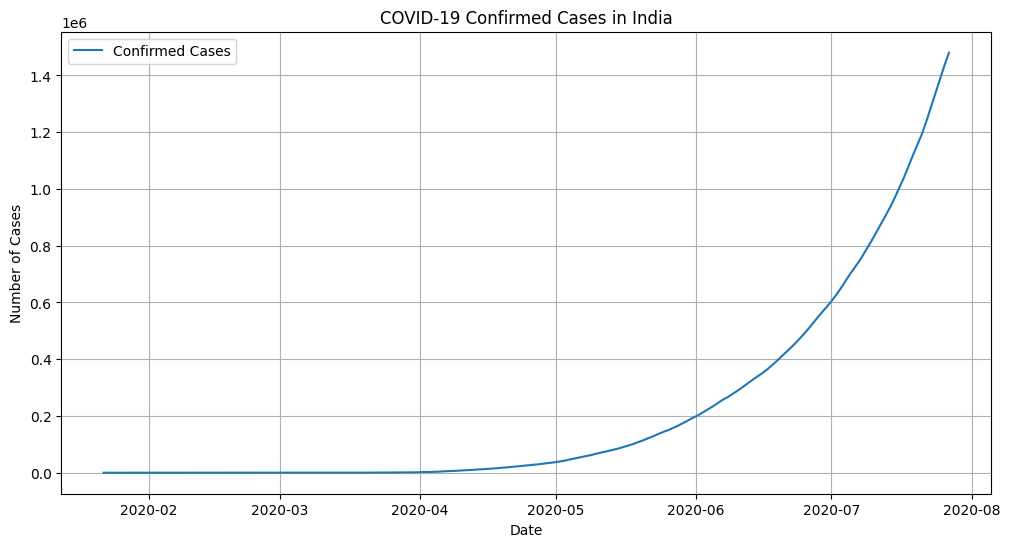

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(india_df['Date'], india_df['Confirmed'], label='Confirmed Cases')
plt.title('COVID-19 Confirmed Cases in India')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend()
plt.grid(True)
plt.show()

In [9]:
!pip install prophet


In [10]:
from prophet import Prophet

# We'll forecast confirmed cases
prophet_df = india_df[['Date', 'Confirmed']].rename(columns={
    'Date': 'ds',
    'Confirmed': 'y'
})


In [11]:
model = Prophet()
model.fit(prophet_df)


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpm7lcnycm/el1lm17b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpm7lcnycm/lxsoxx7i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35844', 'data', 'file=/tmp/tmpm7lcnycm/el1lm17b.json', 'init=/tmp/tmpm7lcnycm/lxsoxx7i.json', 'output', 'file=/tmp/tmpm7lcnycm/prophet_model75a8yj2u/prophet_model-20250803051157.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:11:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:11:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [12]:
# Create future dataframe
future = model.make_future_dataframe(periods=60)

# Predict
forecast = model.predict(future)


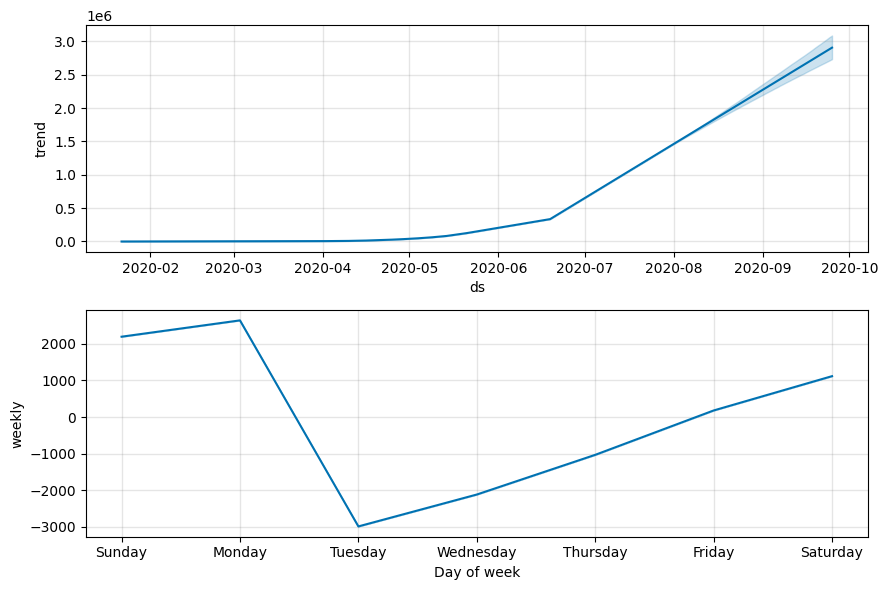

In [13]:
# Plot trend, weekly & yearly seasonality
fig2 = model.plot_components(forecast)


In [14]:
# Merge actual and predicted values
comparison_df = forecast[['ds', 'yhat']].merge(
    prophet_df, on='ds', how='left'
)

# Drop rows where actual data is missing
comparison_df = comparison_df.dropna()

# Display a few rows
comparison_df.head()


,ds,yhat,y
0,2020-01-22,-4219.420579,0.0
1,2020-01-23,-3071.730057,0.0
2,2020-01-24,-1796.446239,0.0
3,2020-01-25,-795.102230,0.0
4,2020-01-26,346.365427,0.0


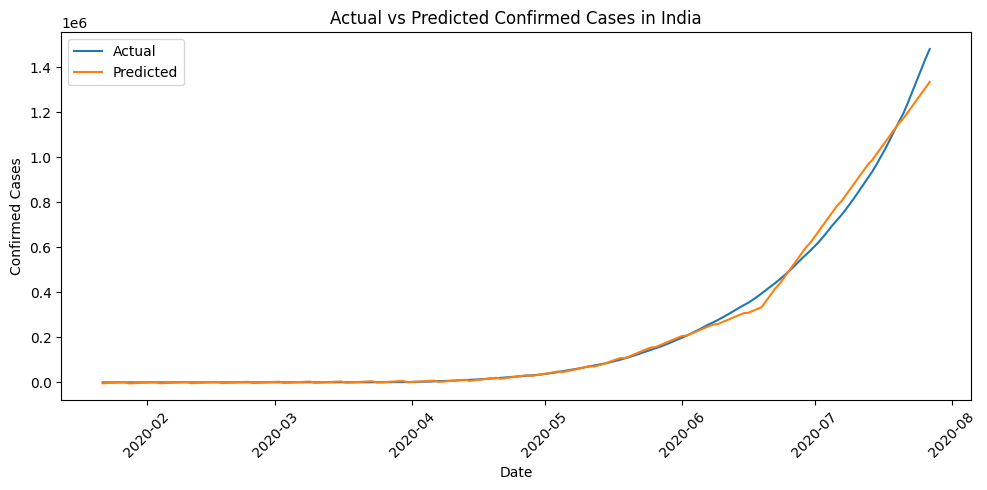

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(comparison_df['ds'], comparison_df['y'], label='Actual')
plt.plot(comparison_df['ds'], comparison_df['yhat'], label='Predicted')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.title('Actual vs Predicted Confirmed Cases in India')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpm7lcnycm/9_o57r3c.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpm7lcnycm/j9qf66rs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18347', 'data', 'file=/tmp/tmpm7lcnycm/9_o57r3c.json', 'init=/tmp/tmpm7lcnycm/j9qf66rs.json', 'output', 'file=/tmp/tmpm7lcnycm/prophet_modellzgtfrbf/prophet_model-20250803051211.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:12:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:12:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


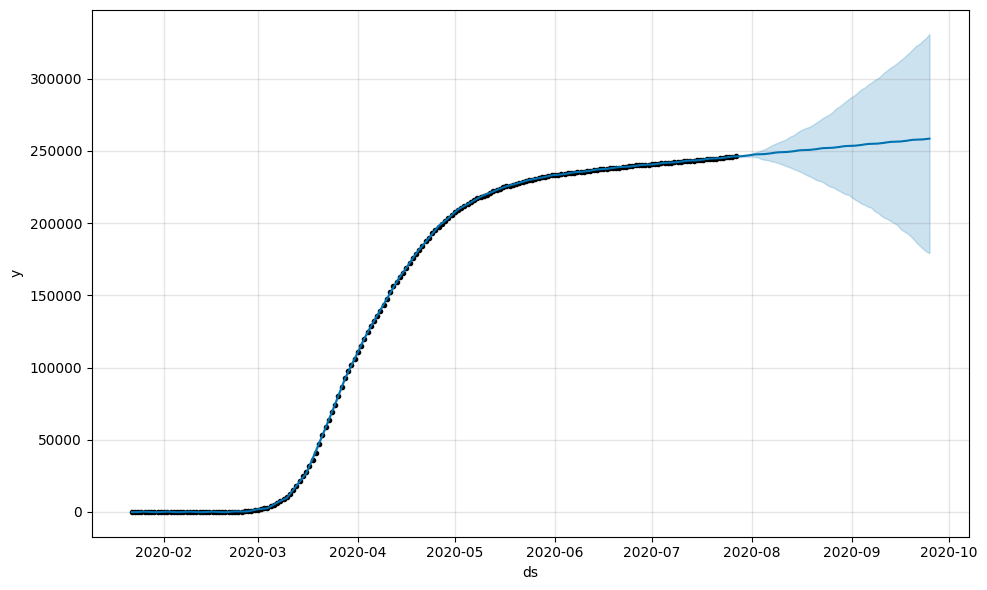

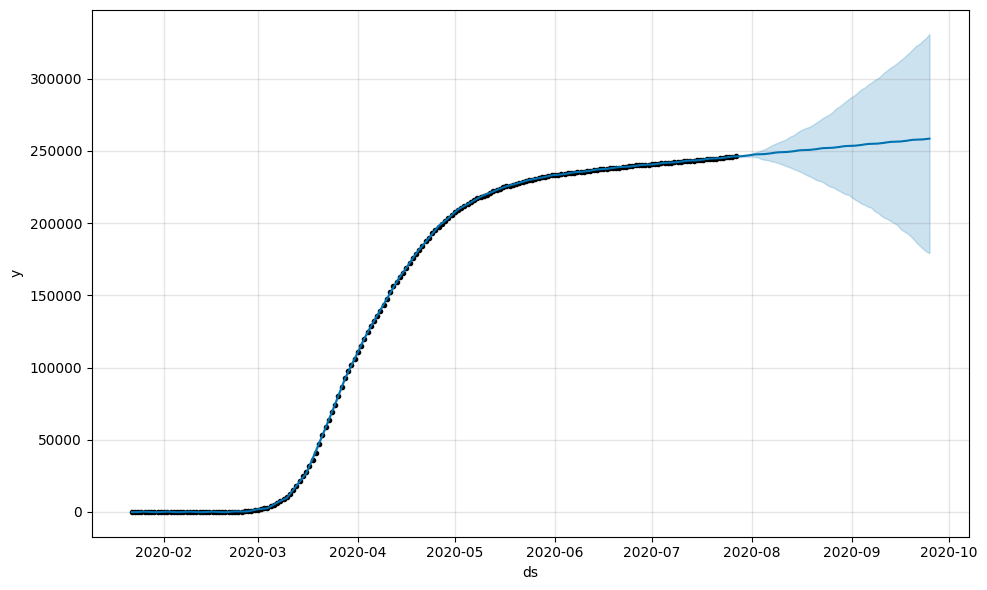

In [16]:
# Example: Forecast for Italy
italy_df = df[df['Country/Region'] == 'Italy'].groupby('Date')[['Confirmed']].sum().reset_index()

prophet_df_italy = italy_df.rename(columns={'Date': 'ds', 'Confirmed': 'y'})

model_italy = Prophet()
model_italy.fit(prophet_df_italy)

future_italy = model_italy.make_future_dataframe(periods=60)
forecast_italy = model_italy.predict(future_italy)

# Plot forecast
model_italy.plot(forecast_italy)


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpm7lcnycm/iszi_7z7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpm7lcnycm/uhqc60lx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10996', 'data', 'file=/tmp/tmpm7lcnycm/iszi_7z7.json', 'init=/tmp/tmpm7lcnycm/uhqc60lx.json', 'output', 'file=/tmp/tmpm7lcnycm/prophet_modelkzwkpow_/prophet_model-20250803051217.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:12:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:12:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


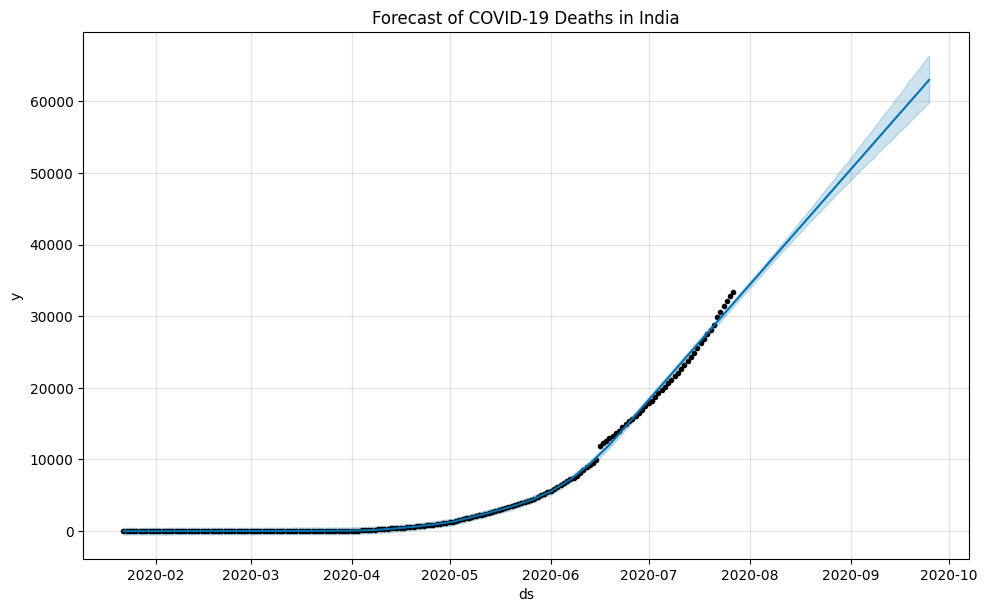

In [17]:
# Prepare data for forecasting deaths
deaths_df = india_df[['Date', 'Deaths']].copy()
deaths_df = deaths_df.rename(columns={'Date': 'ds', 'Deaths': 'y'})

# Fit model
deaths_model = Prophet()
deaths_model.fit(deaths_df)

# Forecast
future_deaths = deaths_model.make_future_dataframe(periods=60)
forecast_deaths = deaths_model.predict(future_deaths)

# Plot
deaths_model.plot(forecast_deaths)
plt.title('Forecast of COVID-19 Deaths in India')
plt.show()


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpm7lcnycm/epi67ct1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpm7lcnycm/0tw58pry.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50147', 'data', 'file=/tmp/tmpm7lcnycm/epi67ct1.json', 'init=/tmp/tmpm7lcnycm/0tw58pry.json', 'output', 'file=/tmp/tmpm7lcnycm/prophet_modelnjbrussj/prophet_model-20250803051223.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:12:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:12:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


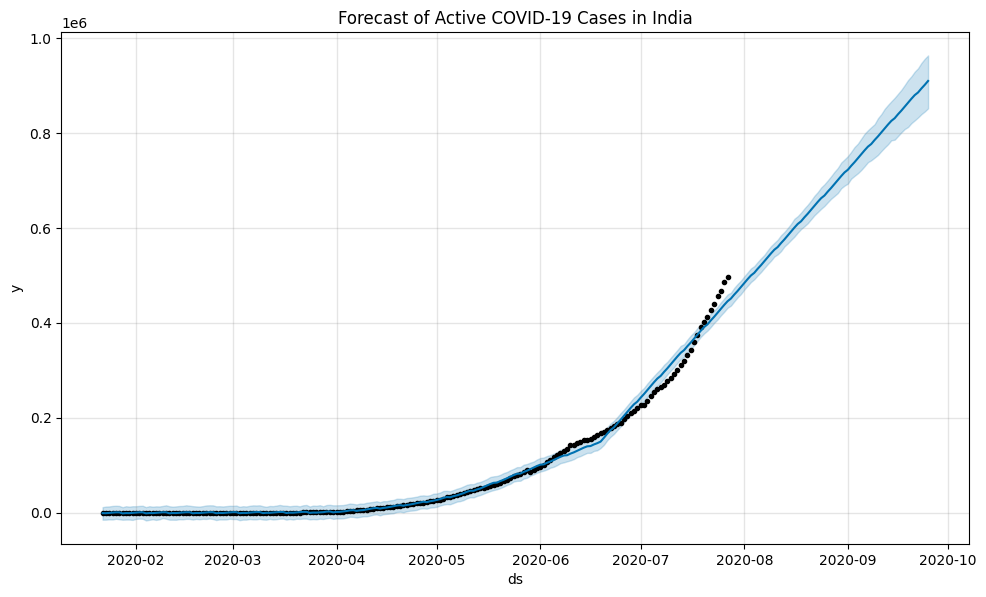

In [18]:
# Prepare data for forecasting active cases
active_df = india_df[['Date', 'Active']].copy()
active_df = active_df.rename(columns={'Date': 'ds', 'Active': 'y'})

# Fit model
active_model = Prophet()
active_model.fit(active_df)

# Forecast
future_active = active_model.make_future_dataframe(periods=60)
forecast_active = active_model.predict(future_active)

# Plot
active_model.plot(forecast_active)
plt.title('Forecast of Active COVID-19 Cases in India')
plt.show()


In [19]:
# Exporting to CSV
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].to_csv('forecast_confirmed.csv', index=False)
forecast_deaths[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].to_csv('forecast_deaths.csv', index=False)
forecast_active[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].to_csv('forecast_active.csv', index=False)


In [20]:
from google.colab import files

files.download('forecast_confirmed.csv')
files.download('forecast_deaths.csv')
files.download('forecast_active.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!pip install gradio


In [21]:
import gradio as gr
from prophet import Prophet

def forecast_covid(country, case_type):
    # Filter data
    country_df = df[df['Country/Region'] == country].groupby('Date')[[case_type]].sum().reset_index()
    country_df = country_df.rename(columns={'Date': 'ds', case_type: 'y'})

    # Fit and predict
    model = Prophet()
    model.fit(country_df)
    future = model.make_future_dataframe(periods=60)
    forecast = model.predict(future)

    # Plot
    fig = model.plot(forecast)
    return fig

# Country list from dataset
countries = sorted(df['Country/Region'].unique())

# Gradio Interface
interface = gr.Interface(
    fn=forecast_covid,
    inputs=[
        gr.Dropdown(choices=countries, label="Select Country", value="India"),
        gr.Dropdown(choices=['Confirmed', 'Deaths', 'Active'], label="Select Case Type", value="Confirmed")
    ],
    outputs="plot",
    title="COVID-19 Forecast Dashboard",
    description="Select a country and case type to view the forecast using Prophet model"
)

interface.launch()


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://3f6dc2dcd18bfb9840.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [22]:
import tempfile
import os

def forecast_covid(country, case_type, forecast_days):
    # Prepare the data
    country_df = df[df['Country/Region'] == country].groupby('Date')[[case_type]].sum().reset_index()
    country_df = country_df.rename(columns={'Date': 'ds', case_type: 'y'})

    # Train Prophet
    model = Prophet()
    model.fit(country_df)

    # Forecast
    future = model.make_future_dataframe(periods=int(forecast_days))
    forecast = model.predict(future)

    # Save forecast to CSV (only essential columns)
    result_df = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].copy()
    temp_dir = tempfile.gettempdir()
    csv_path = os.path.join(temp_dir, f"{country}_{case_type}_forecast.csv")
    result_df.to_csv(csv_path, index=False)

    # Plot
    fig = model.plot(forecast)

    return fig, csv_path


In [23]:
countries = df['Country/Region'].unique().tolist()


In [24]:
import gradio as gr
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt


In [25]:
interface = gr.Interface(
    fn=forecast_covid,
    inputs=[
        gr.Dropdown(choices=countries, label="Select Country", value="India"),
        gr.Dropdown(choices=['Confirmed', 'Deaths', 'Active'], label="Select Case Type", value="Confirmed"),
        gr.Slider(30, 180, step=10, label="Forecast Days", value=60)
    ],
    outputs=[
        gr.Plot(label="Forecast Plot"),
        gr.File(label="Download CSV")
    ],
    title="COVID-19 Forecast Dashboard",
    description="Forecast COVID-19 trends by country and case type using Prophet. Download the results as CSV."
)


In [26]:
interface.launch()


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://7ffbe56e63644f07e2.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
interface.launch(share=True)


Rerunning server... use `close()` to stop if you need to change `launch()` parameters.
----
Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://8dd0b6875ee3651480.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


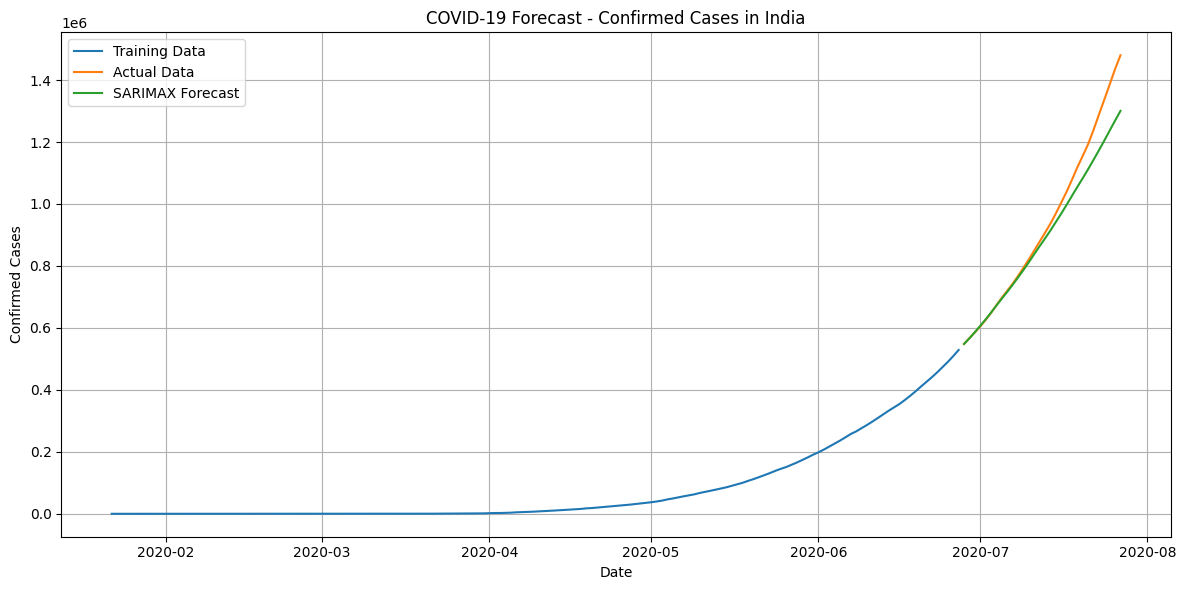

SARIMAX RMSE: 69679.74


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming df is your loaded DataFrame
# Filter for India only and group by Date
india_data = df[df['Country/Region'] == 'India'][['Date', 'Confirmed']]
india_data = india_data.groupby('Date')['Confirmed'].sum().reset_index()

# Convert 'Date' to datetime and set as index
india_data['Date'] = pd.to_datetime(india_data['Date'])
india_data.set_index('Date', inplace=True)

# Ensure daily frequency
india_data = india_data.asfreq('D')
india_data = india_data.fillna(method='ffill')  # Forward fill for any gaps

# Train-test split
train = india_data[:-30]
test = india_data[-30:]

# Fit SARIMAX model
model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 7))
results = model.fit(disp=False)

# Forecast
forecast = results.forecast(steps=30)

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Confirmed'], label='Training Data')
plt.plot(test.index, test['Confirmed'], label='Actual Data')
plt.plot(test.index, forecast, label='SARIMAX Forecast')
plt.title('COVID-19 Forecast - Confirmed Cases in India')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Evaluation
rmse = np.sqrt(mean_squared_error(test, forecast))
print(f"SARIMAX RMSE: {rmse:.2f}")


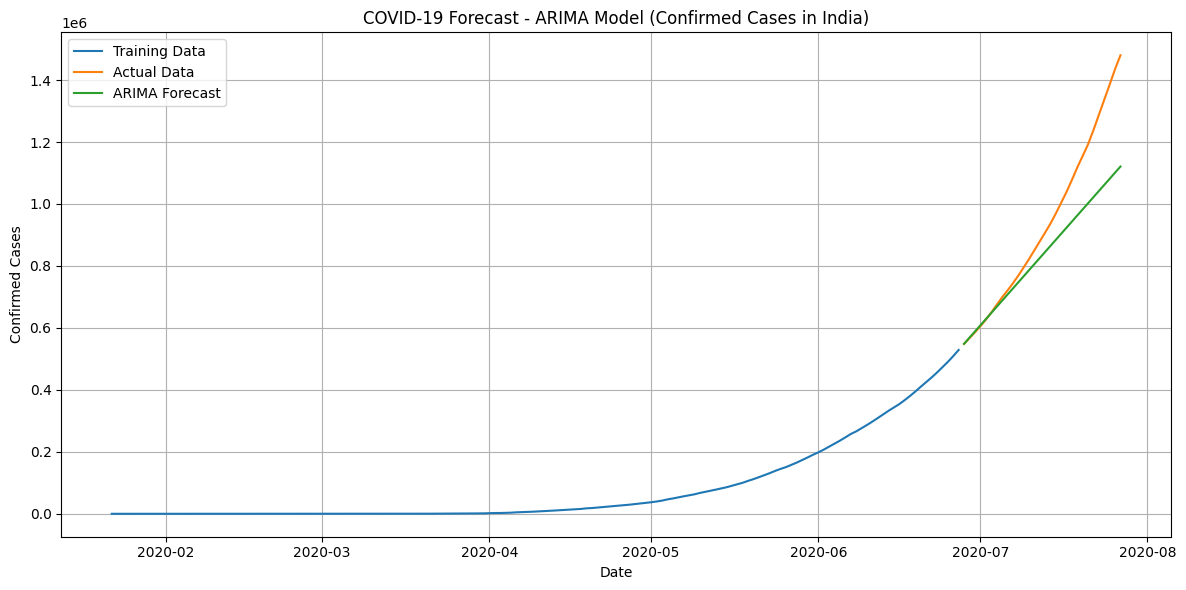

ARIMA RMSE: 149692.46


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Fit plain ARIMA model (non-seasonal)
arima_model = ARIMA(train, order=(1, 1, 1))
arima_results = arima_model.fit()

# Forecast using ARIMA
arima_forecast = arima_results.forecast(steps=30)

# Plot ARIMA results
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Confirmed'], label='Training Data')
plt.plot(test.index, test['Confirmed'], label='Actual Data')
plt.plot(test.index, arima_forecast, label='ARIMA Forecast')
plt.title('COVID-19 Forecast - ARIMA Model (Confirmed Cases in India)')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Evaluate ARIMA performance
arima_rmse = np.sqrt(mean_squared_error(test, arima_forecast))
print(f"ARIMA RMSE: {arima_rmse:.2f}")


In [ ]:
print(f"SARIMAX RMSE: {rmse:.2f}")
print(f"ARIMA RMSE: {arima_rmse:.2f}")


SARIMAX RMSE: 69679.74
ARIMA RMSE: 149692.46
